# **Análisis Exploratorio de Datos - TP1**

##*Organización de Datos (75.06/95.58) - Primer Cuatrimestre 2021*

###### 17 de Mayo de 2021
---

In [1]:
# Importamos librerías
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# Importamos los archivos de entrada desde google drive

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [3]:
link = 'https://drive.google.com/file/d/1d3bvCoox6nxGIWx81EMEQl_hJ1Y0Jp1q/view?usp=sharing' #Drive Vane
  
# to get the id part of the file
id = link.split("/")[-2]
  
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('train_values.csv')

train_values=pd.read_csv('train_values.csv')

In [4]:
link = 'https://drive.google.com/file/d/1zsOf_CScGSl6O2CBbgQUX7TH3CALpXbl/view?usp=sharing' # Drive Vane
  
# to get the id part of the file
id = link.split("/")[-2]
  
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('train_labels.csv')

train_labels=pd.read_csv('train_labels.csv')

#Damage grade:
#1 - Low damage
#2 - Medium damage
#3 - Serious damage


In [5]:
print(train_values.info())
train_values.tail()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260601 entries, 0 to 260600
Data columns (total 39 columns):
 #   Column                                  Non-Null Count   Dtype 
---  ------                                  --------------   ----- 
 0   building_id                             260601 non-null  int64 
 1   geo_level_1_id                          260601 non-null  int64 
 2   geo_level_2_id                          260601 non-null  int64 
 3   geo_level_3_id                          260601 non-null  int64 
 4   count_floors_pre_eq                     260601 non-null  int64 
 5   age                                     260601 non-null  int64 
 6   area_percentage                         260601 non-null  int64 
 7   height_percentage                       260601 non-null  int64 
 8   land_surface_condition                  260601 non-null  object
 9   foundation_type                         260601 non-null  object
 10  roof_type                               260601 non-null 

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
260596,688636,25,1335,1621,1,55,6,3,n,r,n,f,j,s,q,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
260597,669485,17,715,2060,2,0,6,5,t,r,n,f,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
260598,602512,17,51,8163,3,55,6,7,t,r,q,f,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
260599,151409,26,39,1851,2,10,14,6,t,r,x,v,s,j,d,0,0,0,0,0,1,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
260600,747594,21,9,9101,3,10,7,6,n,r,n,f,q,j,d,0,1,0,0,0,0,0,0,0,0,0,v,3,0,0,0,0,0,0,0,0,0,0,0


In [6]:
print(train_labels.info())
train_labels.tail()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260601 entries, 0 to 260600
Data columns (total 2 columns):
 #   Column        Non-Null Count   Dtype
---  ------        --------------   -----
 0   building_id   260601 non-null  int64
 1   damage_grade  260601 non-null  int64
dtypes: int64(2)
memory usage: 4.0 MB
None


,building_id,damage_grade
260596,688636,2
260597,669485,3
260598,602512,3
260599,151409,2
260600,747594,3


In [7]:
data=train_values.merge(train_labels,left_on='building_id',right_on='building_id',how='inner')
data

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
0,802906,6,487,12198,2,30,6,5,t,r,n,f,q,t,d,1,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,3
1,28830,8,900,2812,2,10,8,7,o,r,n,x,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,2
2,94947,21,363,8973,2,10,5,5,t,r,n,f,x,t,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,3
3,590882,22,418,10694,2,10,6,5,t,r,n,f,x,s,d,0,1,0,0,0,0,1,1,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,2
4,201944,11,131,1488,3,30,8,9,t,r,n,f,x,s,d,1,0,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260596,688636,25,1335,1621,1,55,6,3,n,r,n,f,j,s,q,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,2
260597,669485,17,715,2060,2,0,6,5,t,r,n,f,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,3
260598,602512,17,51,8163,3,55,6,7,t,r,q,f,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,3
260599,151409,26,39,1851,2,10,14,6,t,r,x,v,s,j,d,0,0,0,0,0,1,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,2


# Limpieza y preparación de datos

In [8]:
cat_cols=['land_surface_condition','foundation_type','roof_type','ground_floor_type','other_floor_type',
          'position','plan_configuration','legal_ownership_status']
for cc in cat_cols:
    data[cc]=data[cc].astype('category')

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 260601 entries, 0 to 260600
Data columns (total 40 columns):
 #   Column                                  Non-Null Count   Dtype   
---  ------                                  --------------   -----   
 0   building_id                             260601 non-null  int64   
 1   geo_level_1_id                          260601 non-null  int64   
 2   geo_level_2_id                          260601 non-null  int64   
 3   geo_level_3_id                          260601 non-null  int64   
 4   count_floors_pre_eq                     260601 non-null  int64   
 5   age                                     260601 non-null  int64   
 6   area_percentage                         260601 non-null  int64   
 7   height_percentage                       260601 non-null  int64   
 8   land_surface_condition                  260601 non-null  category
 9   foundation_type                         260601 non-null  category
 10  roof_type                       

In [10]:
data.describe()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
count,2.606010e+05,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000
mean,5.256755e+05,13.900353,701.074685,6257.876148,2.129723,26.535029,8.018051,5.434365,0.088645,0.761935,0.034332,0.018235,0.068154,0.075268,0.254988,0.085011,0.042590,0.015859,0.014985,0.983949,0.111880,0.064378,0.033626,0.008101,0.000940,0.000361,0.001071,0.000188,0.000146,0.000088,0.005119,2.238272
std,3.045450e+05,8.033617,412.710734,3646.369645,0.727665,73.565937,4.392231,1.918418,0.284231,0.425900,0.182081,0.133800,0.252010,0.263824,0.435855,0.278899,0.201931,0.124932,0.121491,0.418389,0.315219,0.245426,0.180265,0.089638,0.030647,0.018989,0.032703,0.013711,0.012075,0.009394,0.071364,0.611814
min,4.000000e+00,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.611900e+05,7.000000,350.000000,3073.000000,2.000000,10.000000,5.000000,4.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,5.257570e+05,12.000000,702.000000,6270.000000,2.000000,15.000000,7.000000,5.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,7.897620e+05,21.000000,1050.000000,9412.000000,2.000000,30.000000,9.000000,6.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,1.052934e+06,30.000000,1427.000000,12567.000000,9.000000,995.000000,100.000000,32.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,9.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000


Text(0, 0.5, 'Counts')

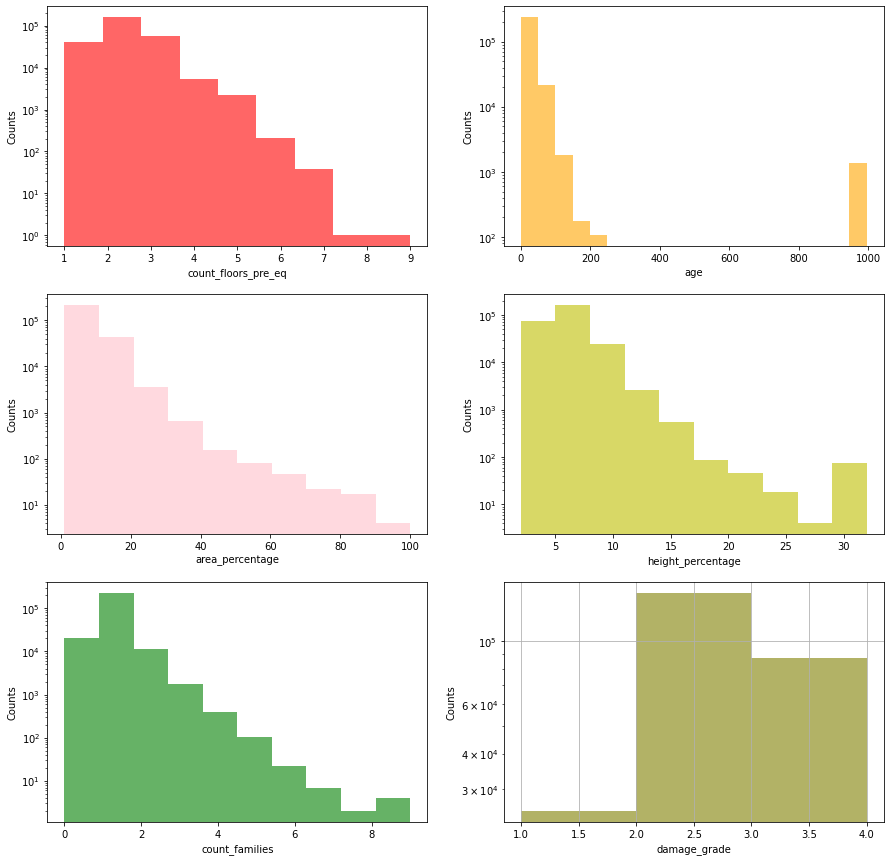

In [11]:
fig, axs = plt.subplots(3,2, figsize=(15, 15), facecolor='w', edgecolor='k')
plt.grid()

ax1,ax2,ax3,ax4,ax5,ax6=axs.ravel()

ax1.hist(data["count_floors_pre_eq"],color='r',alpha=0.6,bins=9,log=True)
ax1.set_xlabel("count_floors_pre_eq")
ax1.set_ylabel("Counts")

ax2.hist(data["age"],color='orange',alpha=0.6,log=True,bins=20)
ax2.set_xlabel("age")
ax2.set_ylabel("Counts")

ax3.hist(data["area_percentage"],color='pink',alpha=0.6,log=True)
ax3.set_xlabel("area_percentage")
ax3.set_ylabel("Counts")

ax4.hist(data["height_percentage"],color='y',alpha=0.6,log=True)
ax4.set_xlabel("height_percentage")
ax4.set_ylabel("Counts")

ax5.hist(data["count_families"],color='g',alpha=0.6,log=True,bins=10)
ax5.set_xlabel("count_families")
ax5.set_ylabel("Counts")

ax6.hist(data["damage_grade"],color='olive',alpha=0.6,bins=[1,2,3,4],log=True)
ax6.set_xlabel("damage_grade")
ax6.set_ylabel("Counts")

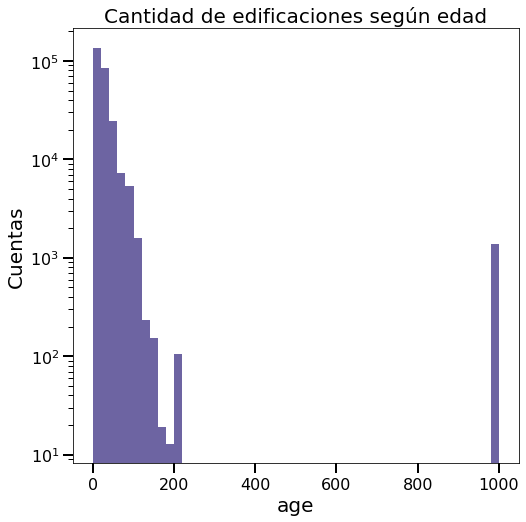

In [12]:
fig, ax = plt.subplots(1,1, figsize=(8, 8), facecolor='w', edgecolor='k')

ax.hist(data["age"],color='darkslateblue',alpha=0.8,log=True,bins=np.arange(0,1001,20))
ax.set_title('Cantidad de edificaciones según edad',fontsize=20)
ax.set_xlabel("age",fontsize=20)
ax.set_ylabel("Cuentas",fontsize=20)
ax.tick_params(axis='both', which='major', length=10, width=2,labelsize=16)
ax.tick_params(axis='both', which='minor', length=5, width=1)

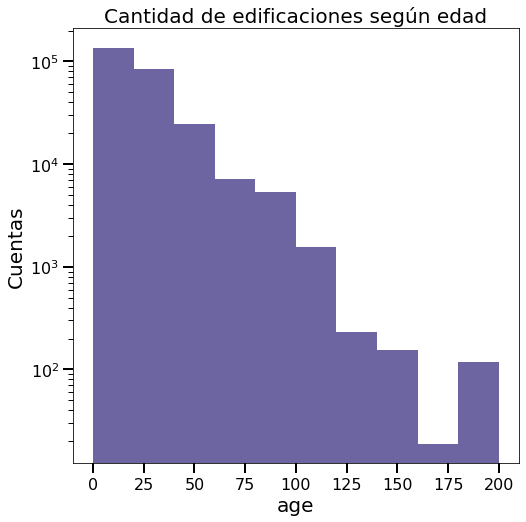

In [13]:
fig, ax = plt.subplots(1,1, figsize=(8, 8), facecolor='w', edgecolor='k')

ax.hist(data["age"],color='darkslateblue',alpha=0.8,log=True,bins=np.arange(0,201,20))
ax.set_title('Cantidad de edificaciones según edad',fontsize=20)
ax.set_xlabel("age",fontsize=20)
ax.set_ylabel("Cuentas",fontsize=20)
ax.tick_params(axis='both', which='major', length=10, width=2,labelsize=16)
ax.tick_params(axis='both', which='minor', length=5, width=1)

In [14]:
np.sort((data.loc[data["age"]<900])["age"].unique())

array([  0,   5,  10,  15,  20,  25,  30,  35,  40,  45,  50,  55,  60,
        65,  70,  75,  80,  85,  90,  95, 100, 105, 110, 115, 120, 125,
       130, 135, 140, 145, 150, 155, 160, 165, 170, 175, 180, 185, 190,
       195, 200])

In [15]:
data['age']=data.age.replace(to_replace=995,value=np.nan) #Hay age de 995 años?
data.describe()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
count,2.606010e+05,260601.000000,260601.000000,260601.000000,260601.000000,259211.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000
mean,5.256755e+05,13.900353,701.074685,6257.876148,2.129723,21.341706,8.018051,5.434365,0.088645,0.761935,0.034332,0.018235,0.068154,0.075268,0.254988,0.085011,0.042590,0.015859,0.014985,0.983949,0.111880,0.064378,0.033626,0.008101,0.000940,0.000361,0.001071,0.000188,0.000146,0.000088,0.005119,2.238272
std,3.045450e+05,8.033617,412.710734,3646.369645,0.727665,19.606818,4.392231,1.918418,0.284231,0.425900,0.182081,0.133800,0.252010,0.263824,0.435855,0.278899,0.201931,0.124932,0.121491,0.418389,0.315219,0.245426,0.180265,0.089638,0.030647,0.018989,0.032703,0.013711,0.012075,0.009394,0.071364,0.611814
min,4.000000e+00,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.611900e+05,7.000000,350.000000,3073.000000,2.000000,10.000000,5.000000,4.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,5.257570e+05,12.000000,702.000000,6270.000000,2.000000,15.000000,7.000000,5.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,7.897620e+05,21.000000,1050.000000,9412.000000,2.000000,30.000000,9.000000,6.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,1.052934e+06,30.000000,1427.000000,12567.000000,9.000000,200.000000,100.000000,32.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,9.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000


#Definiciones útiles

In [16]:
import scipy.stats as ss

def cramers_v(x,y):
  matrix=pd.crosstab(x,y)
  chi2=ss.chi2_contingency(matrix)[0] #chi2_contingency returns chi2, p, degrees of freedom, expected frequencies
  n=matrix.sum().sum()
  phi2=chi2/n
  r,k=matrix.shape
  phi2corr=max(0,phi2-((k-1)*(r-1))/(n-1))
  rcorr=r-((r-1)**2)/(n-1)
  kcorr=k-((k-1)**2)/(n-1)
  return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

In [17]:
import itertools

def compute_cramers(data):
  cols=list(data.columns)
  corrM = np.zeros((len(cols),len(cols)))
  for col1, col2 in itertools.combinations_with_replacement(cols, 2):
    idx1, idx2 = cols.index(col1), cols.index(col2)
    corrM[idx1, idx2] = cramers_v(data[col1], data[col2])
    corrM[idx2, idx1] = corrM[idx1, idx2]
  corr = pd.DataFrame(corrM, index=cols, columns=cols)
  return corr

In [18]:
def graf_frac(data):
  data['countingindex']=1
  cols=corr['damage_grade'][corr['damage_grade']>0.15].index.values #Selecciono variables que mayor correlacióón tienen con damage_grade
  
  for variable in cols:
    if variable!='damage_grade':
      print('\n \n',variable)
      variable_count=data[['countingindex','damage_grade',variable]].groupby(['damage_grade',variable]).agg({'countingindex':'sum'}).unstack().droplevel(0,axis=1).fillna(0)
      #print(variable_count)
      variable_df=pd.DataFrame(np.divide(np.array(variable_count.iloc[2]),np.array(variable_count.sum(axis=0))),index=variable_count.columns.values,columns=['Fracción']).T
      #print(variable_df)
      if 'geo_level' in variable:
        lx=12
        an=False
      else:
        lx=1.2*len(list(variable_count.columns))
        an=True
      plt.figure(figsize=(lx,1))
      g=sns.heatmap(variable_df,cmap='viridis',annot=an,annot_kws={"size":12})
      g.set_yticklabels(g.get_yticklabels(), rotation = 0)
      g.set_title(str(variable))
      plt.show()
      print("La mayor proporción de damage_grade=3 corresponden a ",str(variable),' : ', variable_count.columns[np.argmax(np.divide(np.array(variable_count.iloc[2]),np.array(variable_count.sum(axis=0))))],'\n\n')
  data.drop(columns=['countingindex'], axis=1,inplace = True)

In [19]:
def plot_barplot(data):
  data['grado_1']=data['damage_grade']==1
  data['grado_2']=data['damage_grade']==2
  data['grado_3']=data['damage_grade']==3
  cols=corr['damage_grade'][corr['damage_grade']>0.15].index.values #Selecciono variables que mayor correlacióón tienen con damage_grade

  sns.set_style("whitegrid")

  for variable in cols:
    if variable!='damage_grade' and variable!='geo_level_2_id' and variable!='geo_level_3_id':
      grouped=data.groupby(variable).agg({'grado_1':'sum','grado_2':'sum','grado_3':'sum'})
      #print(grouped.head())
      if 'geo_level' in variable:
        lx=12
      else:
        lx=8
      fig, ax = plt.subplots(1,1, figsize=(lx, 8), facecolor='w', edgecolor='k')
      grouped.plot(kind='bar', stacked=True, ax=ax)

      ax.set_xlabel(str(variable),fontsize=20)
      ax.set_ylabel("Total de edificaciones",fontsize=20)
      ax.tick_params(axis='both', which='major', length=10, width=2,labelsize=16)
      ax.tick_params(axis='both', which='minor', length=5, width=1)

      plt.setp(ax.get_legend().get_texts(), fontsize='16') # for legend text
      plt.setp(ax.get_legend().get_title(), fontsize='18') # for legend title
      ax.tick_params(rotation=0)
  data.drop(columns=['grado_1','grado_2','grado_3'],axis=1,inplace=True)

# Análisis de las variables y visualización de correlaciones

##Variables continuas

In [20]:
data_num=data.select_dtypes(exclude='category')
data_num=data_num.drop(columns='building_id')
data_num=data_num[data_num.columns.drop(list(data_num.filter(like='geo_level')))]
data_num=data_num[data_num.columns.drop(list(data_num.filter(like='has_')))]

data_num.describe()

,count_floors_pre_eq,age,area_percentage,height_percentage,count_families,damage_grade
count,260601.000000,259211.000000,260601.000000,260601.000000,260601.000000,260601.000000
mean,2.129723,21.341706,8.018051,5.434365,0.983949,2.238272
std,0.727665,19.606818,4.392231,1.918418,0.418389,0.611814
min,1.000000,0.000000,1.000000,2.000000,0.000000,1.000000
25%,2.000000,10.000000,5.000000,4.000000,1.000000,2.000000
50%,2.000000,15.000000,7.000000,5.000000,1.000000,2.000000
75%,2.000000,30.000000,9.000000,6.000000,1.000000,3.000000
max,9.000000,200.000000,100.000000,32.000000,9.000000,3.000000


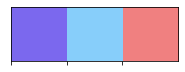

In [21]:
paleta = ['mediumslateblue','lightskyblue','lightcoral']
sns.palplot(paleta)


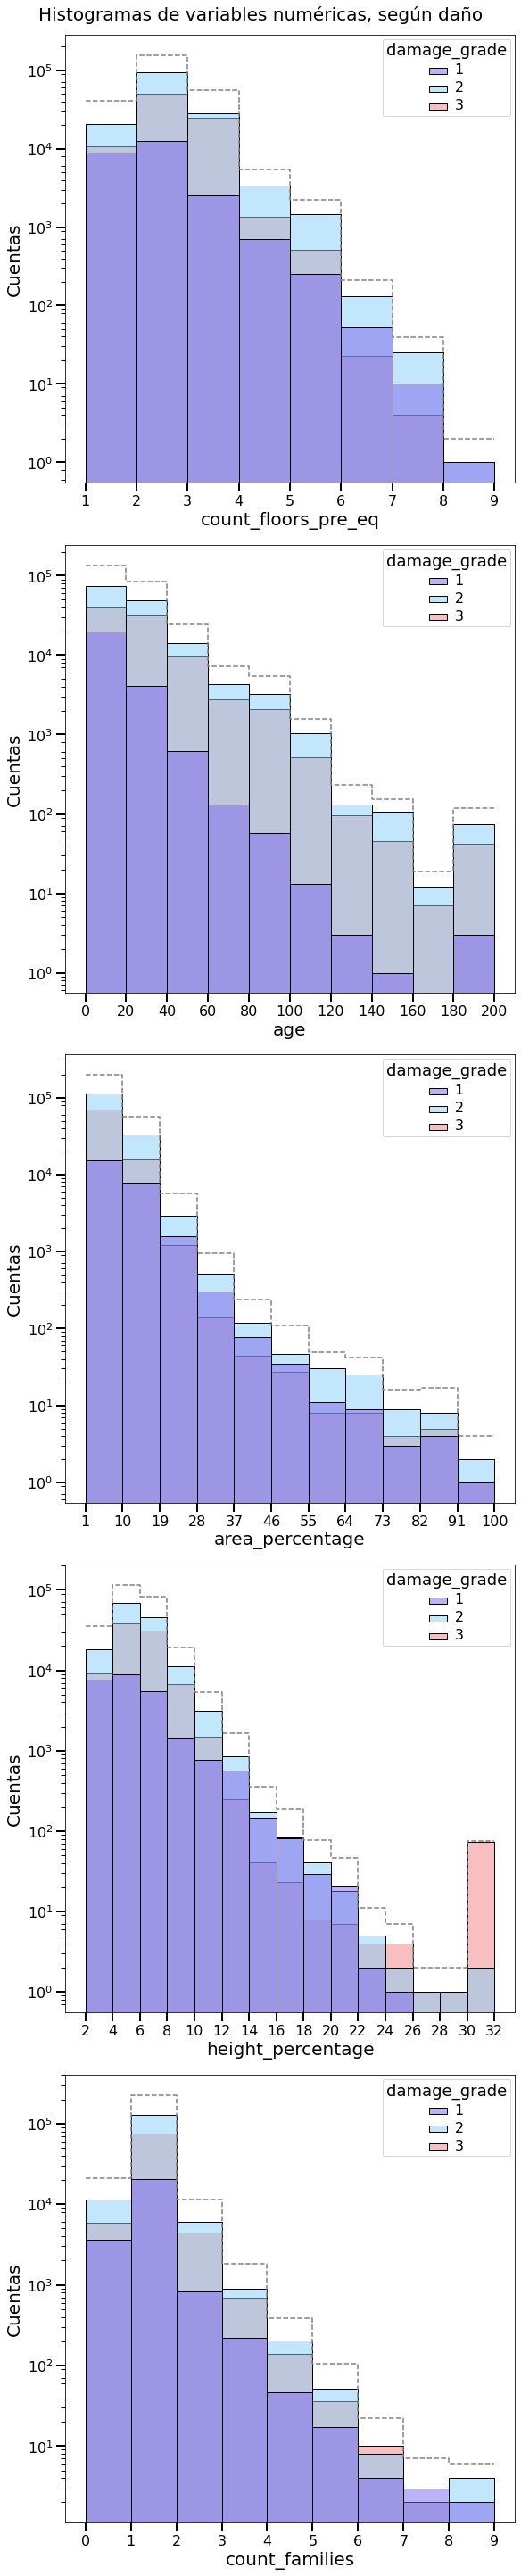

In [22]:
fig, axes = plt.subplots(5,1, figsize=(8, 40), facecolor='w', edgecolor='k',constrained_layout=True)
axes = axes.flatten()  
bins=[1,20,9,2,1]
#binranges=[None, None,None, None,None]
plt.suptitle('Histogramas de variables numéricas, según daño',fontsize=20)

for ax, col,bin in zip(axes, data_num.columns.drop('damage_grade'),bins):
  bines=np.arange(data_num[col].min(),data_num[col].max()+1,bin)
  sns.histplot(data_num, x=col,binwidth=bin,hue='damage_grade',palette=paleta,log_scale=[False,True], ax = ax, cbar_kws={'alpha':0.8})
  sns.histplot(data_num, x=col,binwidth=bin,log_scale=[False,True], ax = ax, element="step",fill=False,color='grey',ls='--')
  ax.set_ylabel("Cuentas",fontsize=20)
  ax.set_xlabel(col,fontsize=20)
  ax.set_xticks(bines)
  ax.tick_params(axis='both', which='major', length=10, width=2,labelsize=16)
  ax.tick_params(axis='y', which='minor', length=5, width=1)
  plt.setp(ax.get_legend().get_texts(), fontsize='16') # for legend text
  plt.setp(ax.get_legend().get_title(), fontsize='18') # for legend title


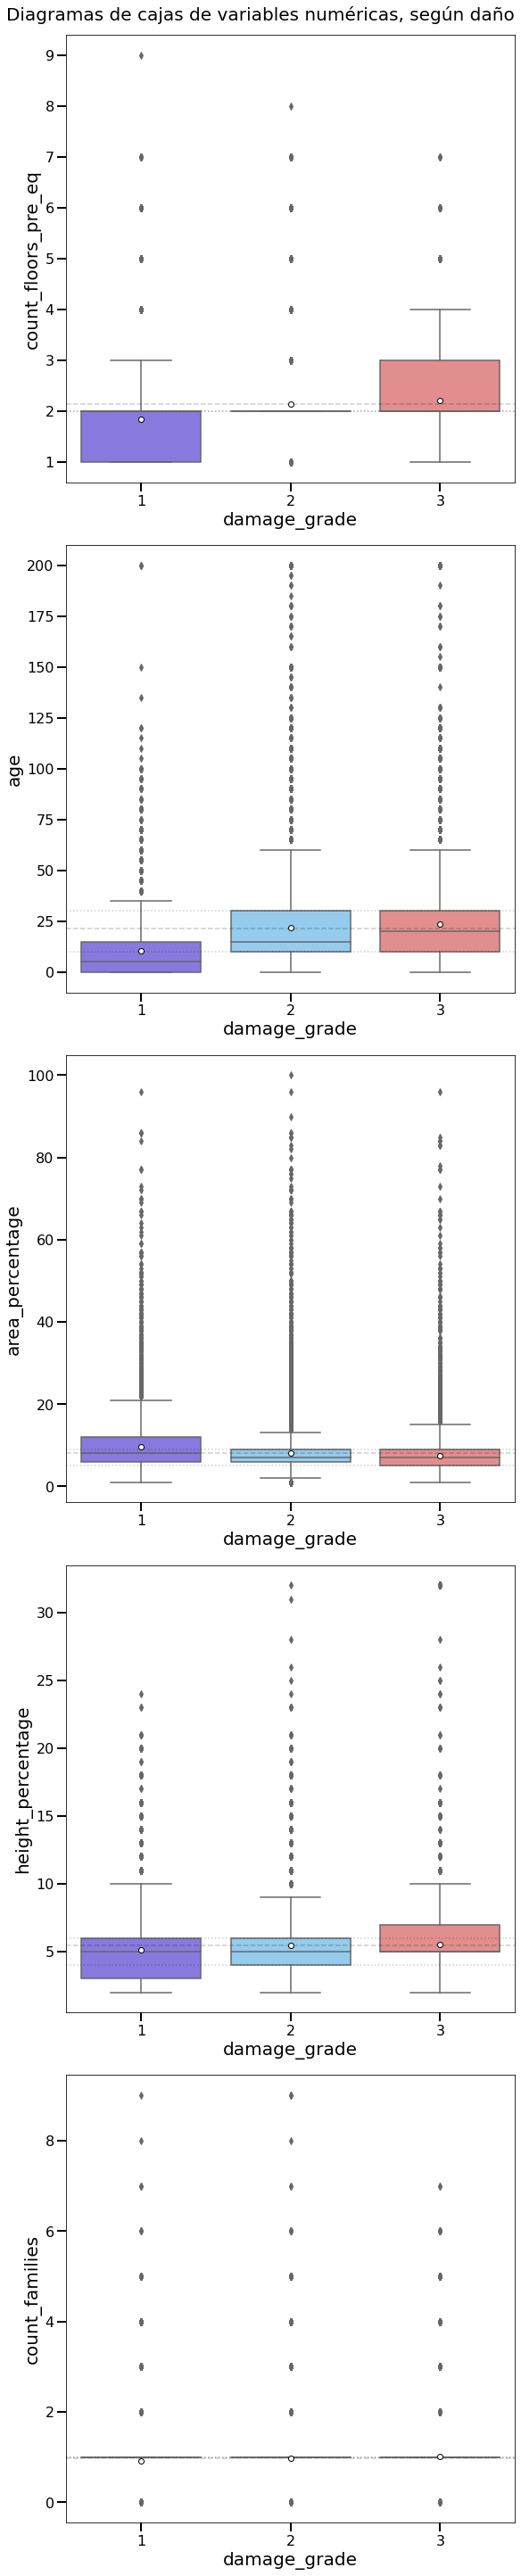

In [23]:
fig, axes = plt.subplots(5,1, figsize=(8, 40), facecolor='w', edgecolor='k',constrained_layout=True)
axes = axes.flatten()  
plt.suptitle('Diagramas de cajas de variables numéricas, según daño',fontsize=20)

for ax, col in zip(axes, data_num.columns.drop('damage_grade')):
  graph=sns.boxplot(x="damage_grade", y=col, data=data_num, palette=paleta,showmeans=True,ax=ax,
              meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"6"})
  graph.axhline(np.nanmean(data_num[col]),color='k',alpha=0.2,linestyle='--')
  graph.axhline(np.percentile(data_num[col].dropna(),75),color='k',linestyle=':',alpha=0.2)
  graph.axhline(np.percentile(data_num[col].dropna(),25),color='k',linestyle=':',alpha=0.2)
  ax.set_ylabel(col,fontsize=20)
  ax.set_xlabel("damage_grade",fontsize=20)
  ax.tick_params(axis='both', which='major', length=10, width=2,labelsize=16)



In [24]:
sns.set(font_scale=2) 
sns.set_style("whitegrid")

g = sns.pairplot(data_num,hue="damage_grade",palette=paleta,height=4, aspect=1,corner=False,
                 plot_kws={'alpha':0.6, 's':80, 'edgecolor':'k'},
                 diag_kws={'linewidth':2},
                 grid_kws={'despine':False})
g.fig.suptitle('Gráfico de a pares de variables numéricas',fontsize=22)
g.fig.subplots_adjust(top=.94)

In [44]:
data['damage_grade'].value_counts()

2    148259
3     87218
1     25124
Name: damage_grade, dtype: int64

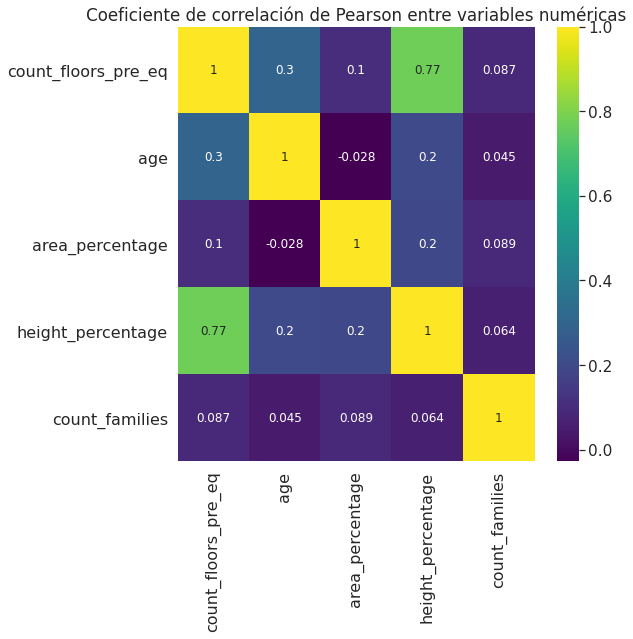

In [25]:
sns.set(font_scale=1.4)
fig, ax = plt.subplots(1,1, figsize=(8, 8))
sns.heatmap(data_num[list(data_num.columns)[0:-1]].corr(), cmap="viridis", annot=True,ax=ax,annot_kws={"size":12})

ax.tick_params(axis='both',labelsize=16)

ax.set_title("Coeficiente de correlación de Pearson entre variables numéricas");

##Variables binarias

In [26]:
# Dataframe con variables binarias únicamente 

data_bin=data.select_dtypes(exclude='category')
data_bin=data_bin.drop(columns='building_id')
data_bin=data_bin.drop(columns=list(data_num.columns)[0:-1])
data_bin=data_bin[data_bin.columns.drop(list(data_bin.filter(like='geo_level')))]

data_bin.describe()

,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
count,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000
mean,0.088645,0.761935,0.034332,0.018235,0.068154,0.075268,0.254988,0.085011,0.042590,0.015859,0.014985,0.111880,0.064378,0.033626,0.008101,0.000940,0.000361,0.001071,0.000188,0.000146,0.000088,0.005119,2.238272
std,0.284231,0.425900,0.182081,0.133800,0.252010,0.263824,0.435855,0.278899,0.201931,0.124932,0.121491,0.315219,0.245426,0.180265,0.089638,0.030647,0.018989,0.032703,0.013711,0.012075,0.009394,0.071364,0.611814
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000


In [27]:
[data_bin[col].unique() for col in list(data_bin.columns)] #Son todas binarias

[array([1, 0]),
 array([1, 0]),
 array([0, 1]),
 array([0, 1]),
 array([0, 1]),
 array([0, 1]),
 array([0, 1]),
 array([0, 1]),
 array([0, 1]),
 array([0, 1]),
 array([0, 1]),
 array([0, 1]),
 array([0, 1]),
 array([0, 1]),
 array([0, 1]),
 array([0, 1]),
 array([0, 1]),
 array([0, 1]),
 array([0, 1]),
 array([0, 1]),
 array([0, 1]),
 array([0, 1]),
 array([3, 2, 1])]

Para poder estudiar correlaciones, primero analizamos la correlación de damage_grade con una columna de valores random

In [28]:
data_bin_comp=data_bin[['damage_grade']].copy()
corr_dummies=[]

for i in range(10):
  data_bin_comp['dummies']=np.random.randint(0, 2, len(data_bin_comp))
  corr_dummies.append(compute_cramers(data_bin_comp)['dummies']['damage_grade'])

corr_dum=np.max(corr_dummies)
corr_dum

0.0039818932945367815

###Estructura

In [29]:
#Me quedo sólo con las variables del tipo 'has_superstructure'
data_bin_struc=data_bin[data_bin.columns.drop(list(data_bin.filter(like='has_secondary')))]

data_bin_struc.describe()

,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,damage_grade
count,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000
mean,0.088645,0.761935,0.034332,0.018235,0.068154,0.075268,0.254988,0.085011,0.042590,0.015859,0.014985,2.238272
std,0.284231,0.425900,0.182081,0.133800,0.252010,0.263824,0.435855,0.278899,0.201931,0.124932,0.121491,0.611814
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000


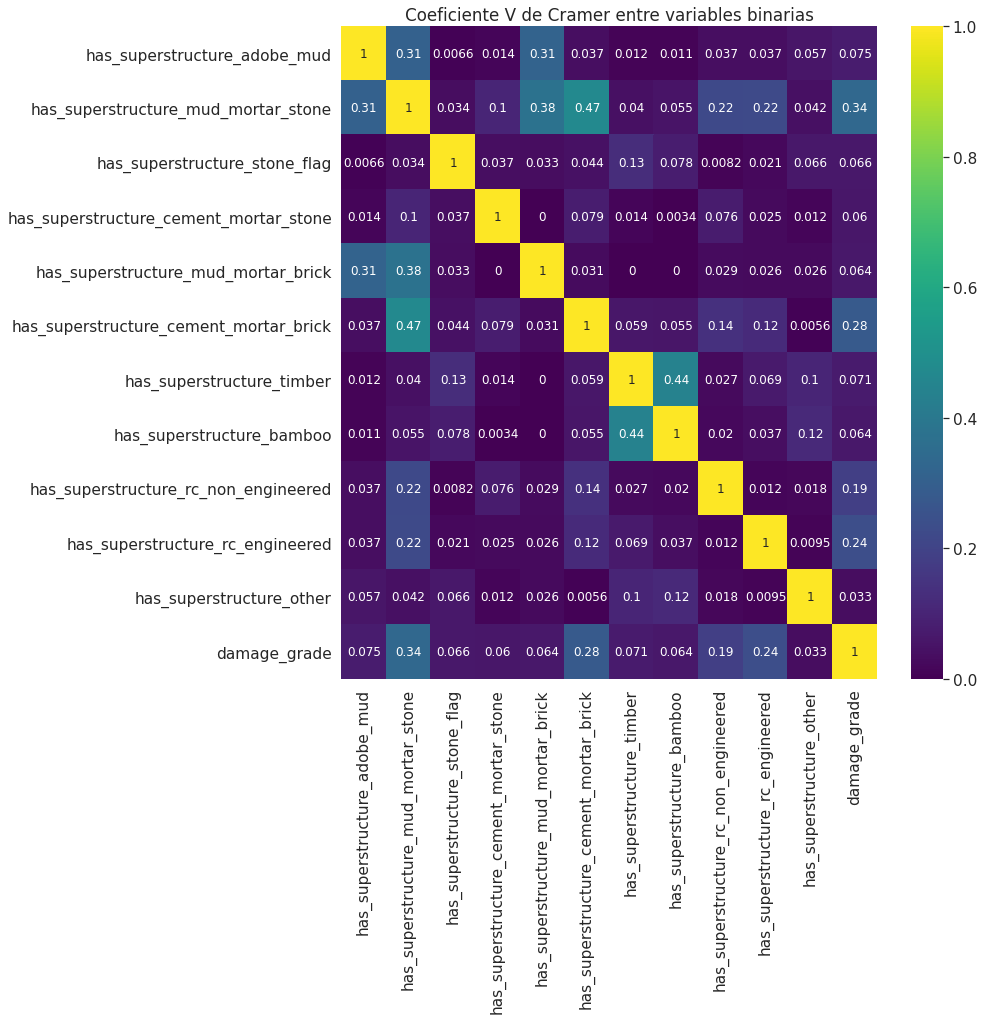

In [30]:
corr= compute_cramers(data_bin_struc)
fig, ax = plt.subplots(figsize=(12, 12))
ax = sns.heatmap(corr, cmap="viridis", annot=True,ax=ax,annot_kws={"size":12})
ax.set_title("Coeficiente V de Cramer entre variables binarias");

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  



 
 has_superstructure_mud_mortar_stone


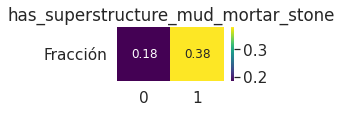

La mayor proporción de damage_grade=3 corresponden a  has_superstructure_mud_mortar_stone  :  1 



 
 has_superstructure_cement_mortar_brick


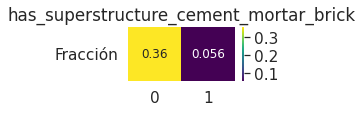

La mayor proporción de damage_grade=3 corresponden a  has_superstructure_cement_mortar_brick  :  0 



 
 has_superstructure_rc_non_engineered


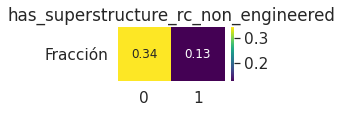

La mayor proporción de damage_grade=3 corresponden a  has_superstructure_rc_non_engineered  :  0 



 
 has_superstructure_rc_engineered


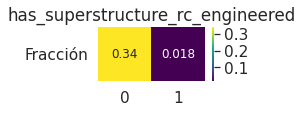

La mayor proporción de damage_grade=3 corresponden a  has_superstructure_rc_engineered  :  0 




/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [31]:
graf_frac(data_bin_struc)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

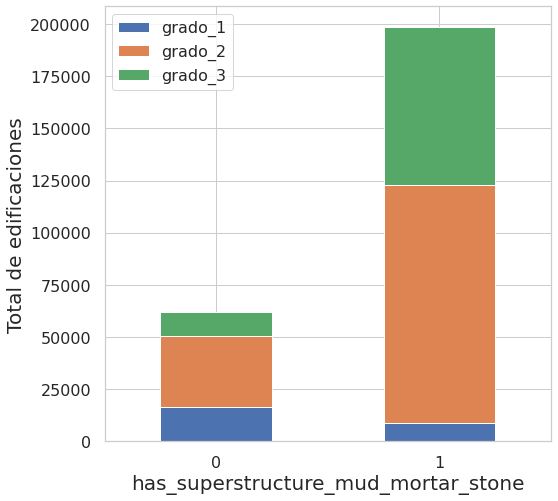

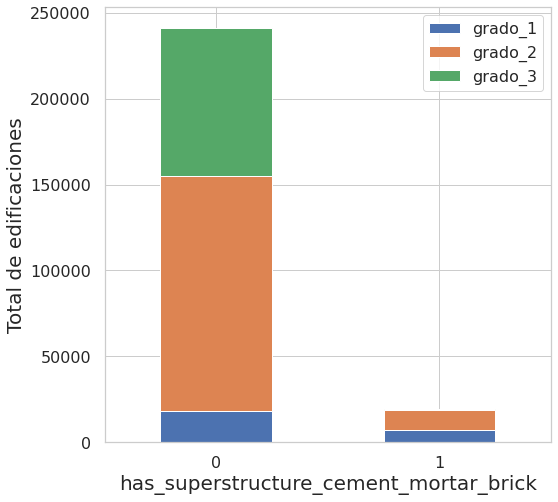

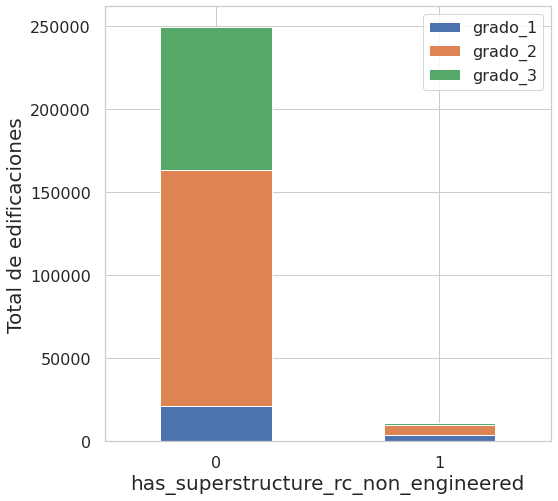

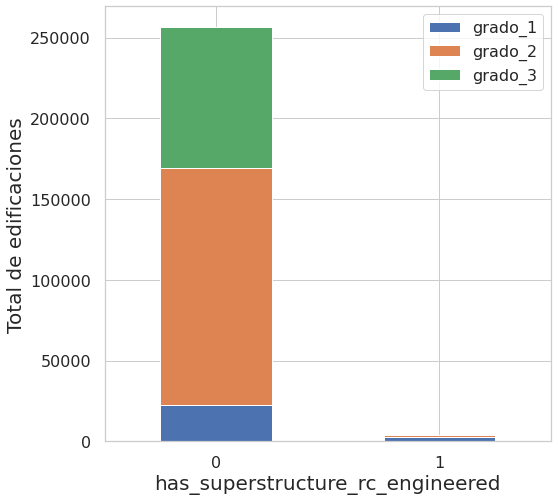

In [32]:
plot_barplot(data_bin_struc)

###Uso

In [33]:
#Me quedo sólo con las variables del tipo 'has_secondary_use'
data_bin_use=data_bin[data_bin.columns.drop(list(data_bin.filter(like='has_superstructure')))]

data_bin_use.describe()

,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
count,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000
mean,0.111880,0.064378,0.033626,0.008101,0.000940,0.000361,0.001071,0.000188,0.000146,0.000088,0.005119,2.238272
std,0.315219,0.245426,0.180265,0.089638,0.030647,0.018989,0.032703,0.013711,0.012075,0.009394,0.071364,0.611814
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000


In [34]:
sin_sec_use=data_bin_use.loc[data_bin_use['has_secondary_use']==0] #Si has_secondary_use es 0, todas las otras son 0
sin_sec_use.describe()

,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
count,231445.0,231445.0,231445.0,231445.0,231445.0,231445.0,231445.0,231445.0,231445.0,231445.0,231445.0,231445.000000
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.255564
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.608810
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.000000
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.000000
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.000000
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.000000


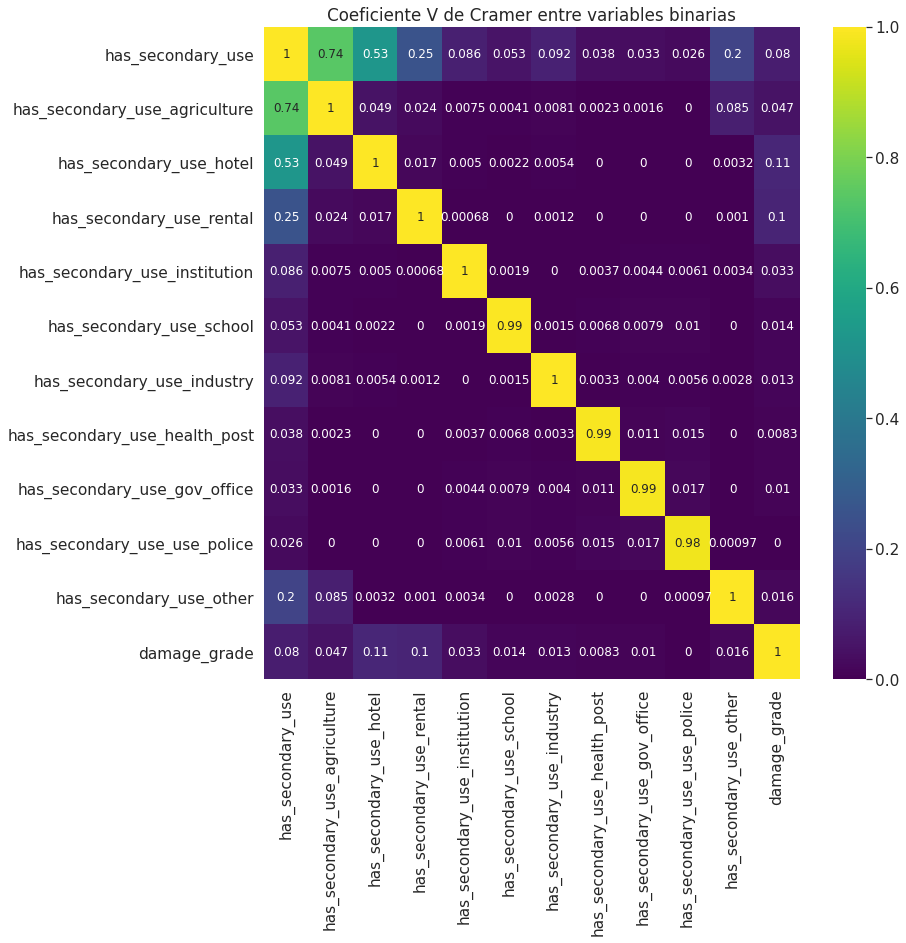

In [37]:
corr= compute_cramers(data_bin_use)
fig, ax = plt.subplots(figsize=(12, 12))
ax = sns.heatmap(corr, cmap="viridis", annot=True,ax=ax,annot_kws={"size":12})
ax.set_title("Coeficiente V de Cramer entre variables binarias");

In [38]:
graf_frac(data_bin_use)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [39]:
plot_barplot(data_bin_use)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

##Variables categóricas

In [40]:
# Dataframe con variables categóricas únicamente 
data_cat=data.drop(columns=list(data_num.columns)[0:-1])
data_cat=data_cat.drop(columns=list(data_bin.columns)[0:-1])
data_cat=data_cat.drop(columns='building_id')
data_cat.head()

,geo_level_1_id,geo_level_2_id,geo_level_3_id,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,legal_ownership_status,damage_grade
0,6,487,12198,t,r,n,f,q,t,d,v,3
1,8,900,2812,o,r,n,x,q,s,d,v,2
2,21,363,8973,t,r,n,f,x,t,d,v,3
3,22,418,10694,t,r,n,f,x,s,d,v,2
4,11,131,1488,t,r,n,f,x,s,d,v,3


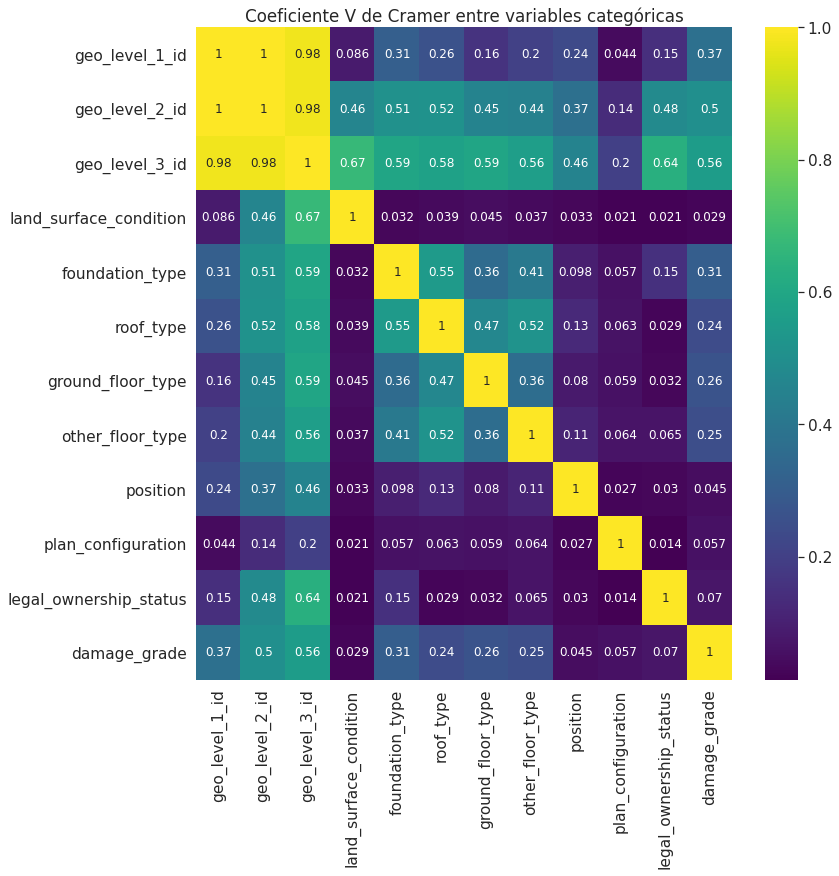

In [41]:
corr= compute_cramers(data_cat)
fig, ax = plt.subplots(figsize=(12, 12))
ax = sns.heatmap(corr, cmap="viridis", annot=True,ax=ax,annot_kws={"size":12})
ax.set_title("Coeficiente V de Cramer entre variables categóricas");

In [45]:
grouped=data_cat.groupby('geo_level_2_id').geo_level_1_id.nunique()
print(grouped.max())
#Cada valor de geo_level_2_id corresponde a un único geo_level_1_id

1

In [48]:
grouped=data_cat.groupby('geo_level_3_id').geo_level_2_id.nunique()
print(grouped.max())
#Cada valor de geo_level_3_id corresponde a un único geo_level_3_id

1


 
 geo_level_1_id


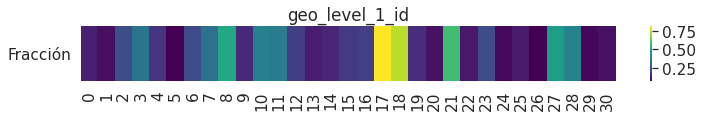

La mayor proporción de damage_grade=3 corresponden a  geo_level_1_id  :  17 



 
 geo_level_2_id


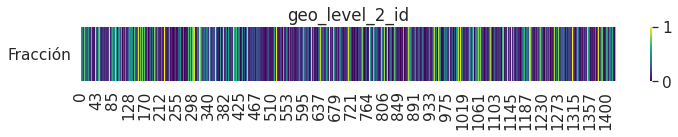

La mayor proporción de damage_grade=3 corresponden a  geo_level_2_id  :  77 



 
 geo_level_3_id


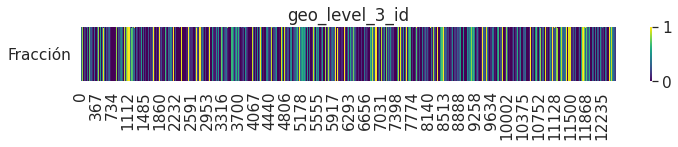

La mayor proporción de damage_grade=3 corresponden a  geo_level_3_id  :  0 



 
 foundation_type


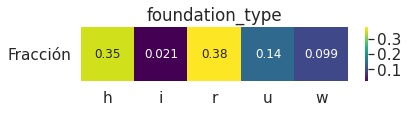

La mayor proporción de damage_grade=3 corresponden a  foundation_type  :  r 



 
 roof_type


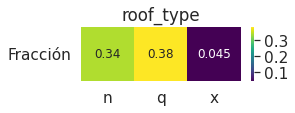

La mayor proporción de damage_grade=3 corresponden a  roof_type  :  q 



 
 ground_floor_type


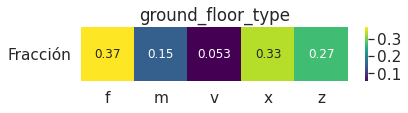

La mayor proporción de damage_grade=3 corresponden a  ground_floor_type  :  f 



 
 other_floor_type


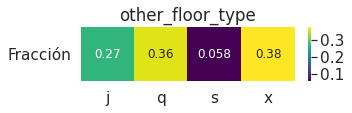

La mayor proporción de damage_grade=3 corresponden a  other_floor_type  :  x 




In [42]:
graf_frac(data_cat)

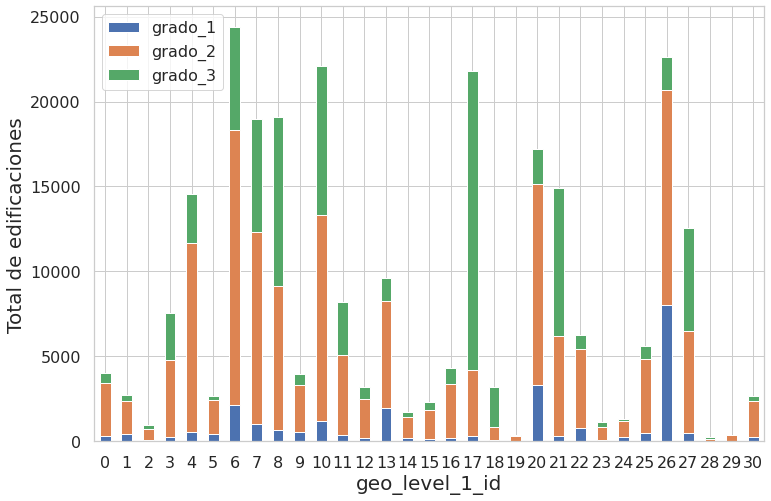

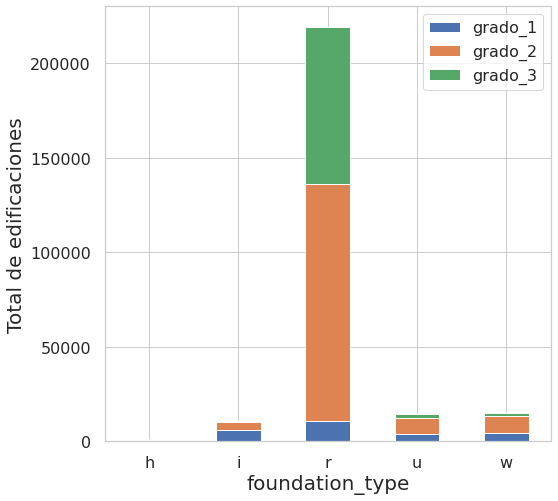

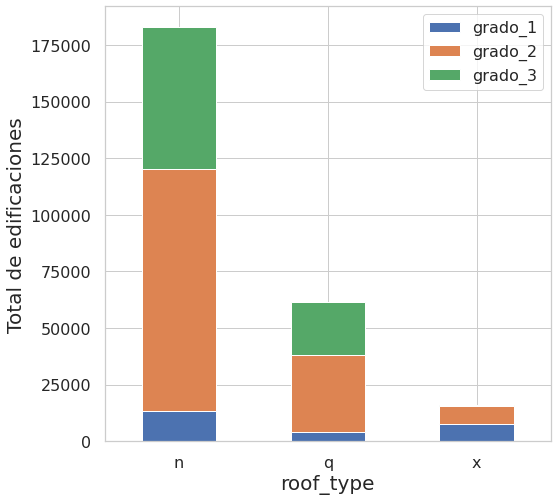

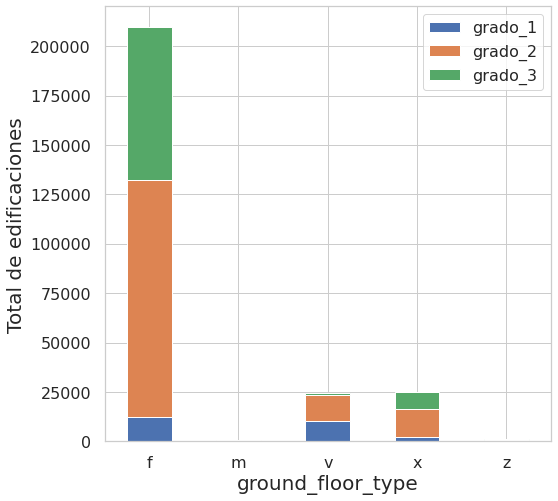

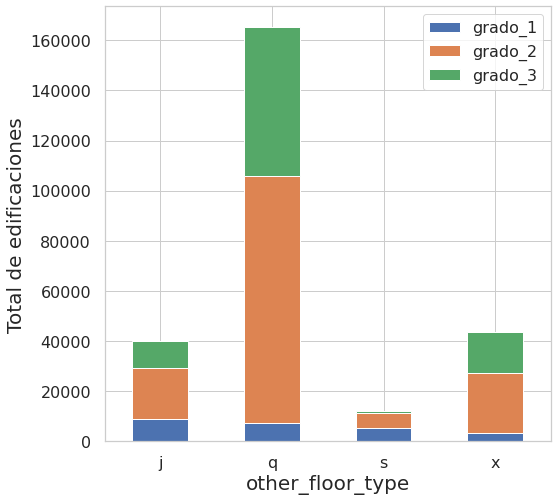

In [43]:
plot_barplot(data_cat)